In [2]:
from connect_n.env import ConnectN
from gymnasium.spaces import MultiDiscrete

env = ConnectN(render_mode="rgb_array")

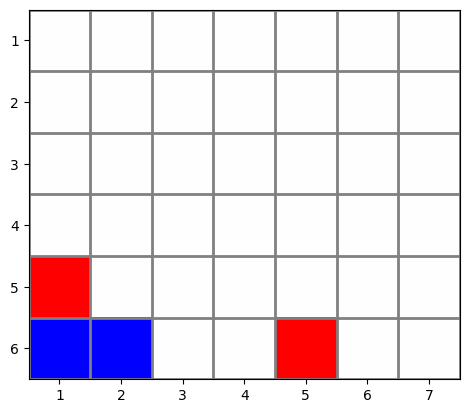

In [3]:
env.step(0)
env.step(4)
env.step(1)
env.step(0)
env.render()
None

In [3]:
from abc import ABC

from gymnasium import Env
import numpy as np


class Agent(ABC):
    def __init__(self, env: Env):
        super().__init__()
        self._env = env

    def predict(self, state: np.ndarray):
        raise NotImplementedError
    
    def learn(self):
        raise NotImplementedError
    
    def train(self):
        raise NotImplementedError
    
    def add_to_memory(self, state, action, reward, next_state, done):
        # required to implemented only if the algorithms needs to do so
        pass
    
    


class RandomAgent(Agent):
    def __init__(self, env):
        super().__init__(env)

    def predict(self, state):
        return self._env.action_space.sample()
    
    def train(self):
        pass

    def learn(self):
        pass

In [4]:
from typing import List
from gymnasium import Env
from tqdm import tqdm

class DuelTrainer:
    def __init__(self, env: Env, agents: List[Agent]):
        self._agents = agents
        self._env = env

    def train(self, episodes: int):
        for _ in tqdm(range(episodes)):
            state = self._env.reset()
            done = False

            while not done:
                for agent in self._agents:
                    action = agent.predict(state)
                    next_state, reward, terminated, truncated, _ = self._env.step(action)
                    done = terminated or truncated
                    agent.add_to_memory(state, action, reward, next_state, done)

                    if done:
                        break
                    
                    state = next_state
                
            for agent in self._agents:
                agent.train()


In [5]:
duel = DuelTrainer(ConnectFour(), [RandomAgent(env), RandomAgent(env)])

duel.train(10)

100%|██████████| 10/10 [00:00<00:00, 247.01it/s]
